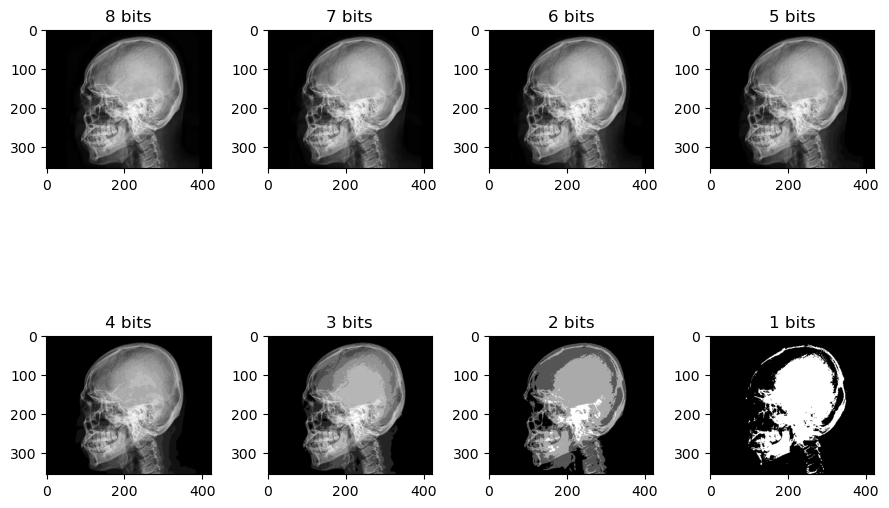

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def make_gray_image(image):
    gray_image = np.mean(image, axis=2).astype(np.uint8)
    return gray_image


def custom_gray_image_generator():
    custom_image = np.empty((16, 16), dtype=np.uint8)
    val = 0
    for i in range(16):
        for j in range(16):
            custom_image[i, j] = val
            val += 1
    return custom_image


def intensity_resolution(image, bits):
    desired_levels = 2**bits
    normalized_image = image.astype(float)/256.0
    sampled_image = np.uint8(np.floor(normalized_image*(desired_levels)))

    return sampled_image


rgb_image = plt.imread('../images/skull.jpg')
gray_image = make_gray_image(rgb_image)

# for testing prpose image generate
# gray_image = custom_gray_image_generator()

sampled_image_array = []
sampled_image_array.append(gray_image)

for bits in range(7, 0, -1):
    sampled_image = intensity_resolution(gray_image, bits)
    sampled_image_array.append(sampled_image)


row, col = 2, 4
fig, ax = plt.subplots(row, col, figsize=(9, 7))

idx = 0
for i in range(row):
    for j in range(col):
        ax[i, j].imshow(sampled_image_array[idx], cmap='gray')
        ax[i, j].set_title(f'{8 - idx} bits')
        idx += 1

plt.tight_layout()
plt.show()

# print(sampled_image_array[6])